# ARIMA Model (Auto Regression)

### Regression Example

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: xlabel='total_bill', ylabel='tip'>

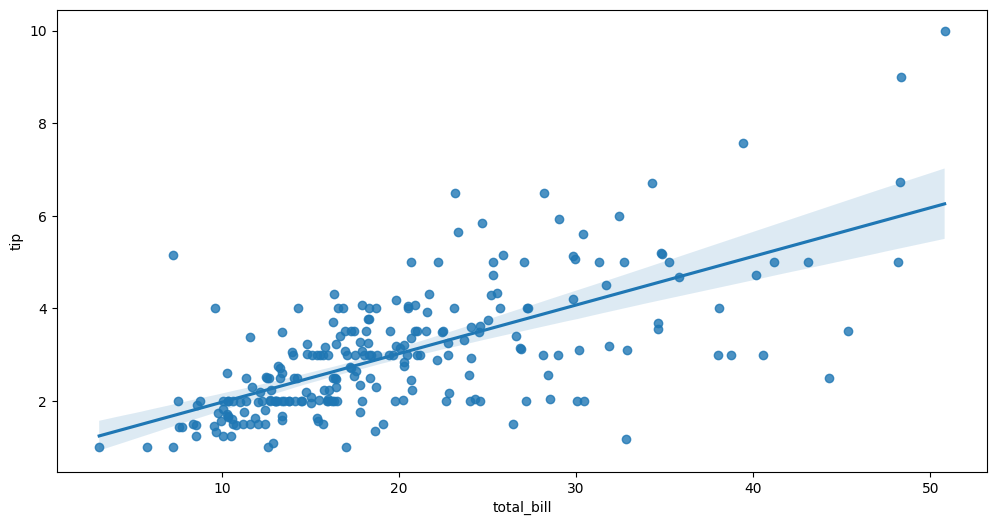

In [8]:
tips = sns.load_dataset('tips')
plt.figure(figsize=(12,6))
sns.regplot(x='total_bill,', y = 'tip', data=tip)

### Regression Time Series Example with AutoReg

In [183]:
# import library
import pandas as pd
import numpy as np

In [184]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

mpc_df = pd.read_csv('new_df.csv', index_col='everyday', parse_dates=True) 
mpc_df.head()


,quantity
everyday,
2022-10-01,8760.0
2022-10-02,9720.0
2022-10-03,11820.0
2022-10-04,12720.0
2022-10-05,11880.0


In [185]:
mpc_df.shape

(322, 1)

In [186]:
mpc_df.tail()

,quantity
everyday,
2023-08-17,8580.0
2023-08-18,7380.0
2023-08-19,6720.0
2023-08-20,8100.0
2023-08-21,7860.0


In [187]:
mpc_df = mpc_df.asfreq('d')
mpc_df = mpc_df.fillna(method='ffill')
mpc_df.isnull().values.any()


False

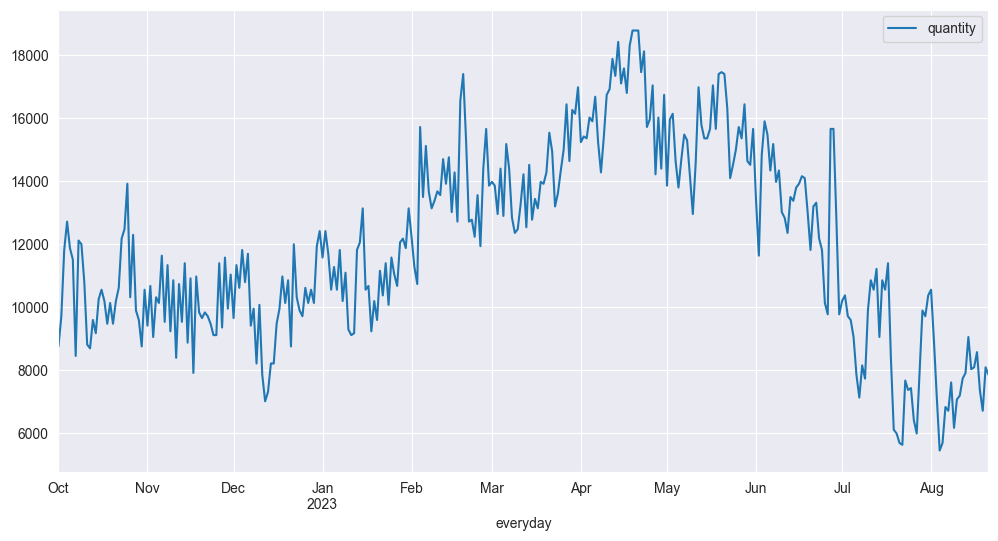

In [188]:
sns.set_style('darkgrid')
pd.plotting.register_matplotlib_converters()
sns.mpl.rc('figure', figsize=(12,6))
fig, ax = plt.subplots()
ax = mpc_df.plot(ax=ax)

In [189]:
model = AutoReg(mpc_df['quantity'], 30)
model_fit = model.fit()

len(mpc_df)

325

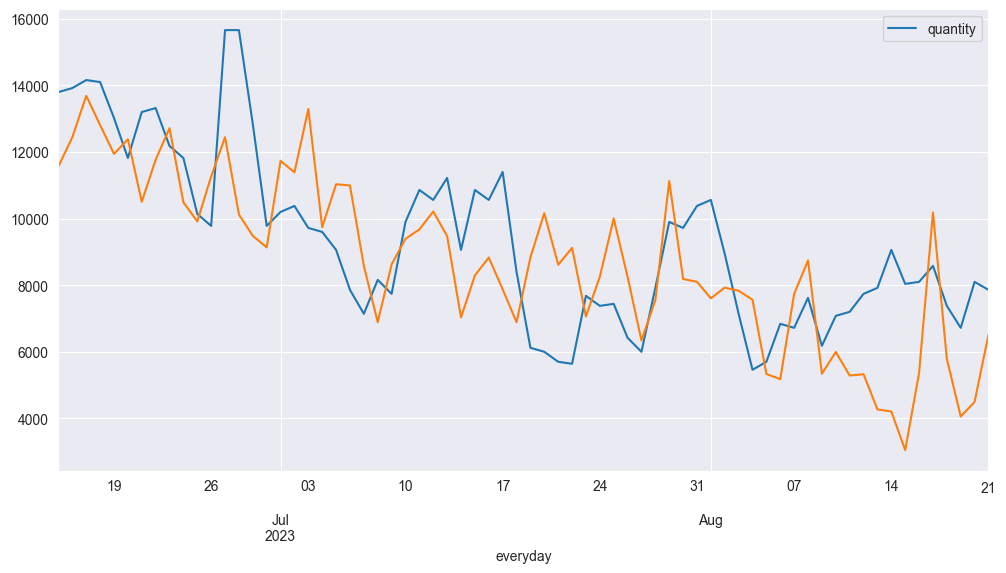

In [190]:

fig, ax = plt.subplots()  
train_df = mpc_df.iloc[:257]
test_df = mpc_df.iloc[257:]

train_model = AutoReg(train_df['quantity'], 90).fit(cov_type='HC0')

start = len(train_df)
end = len(train_df) + len(test_df) - 1

prediction = train_model.predict(start=start, end=end, dynamic=True)
ax = test_df.plot(ax=ax)
ax = prediction.plot(ax=ax)
plt.show()  

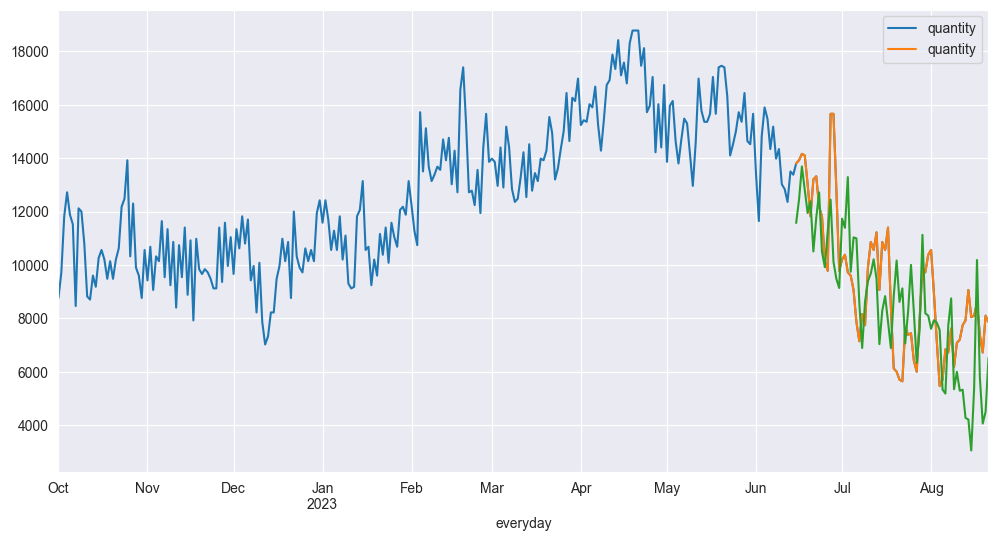

In [191]:
sns.set_style('darkgrid')
pd.plotting.register_matplotlib_converters()
sns.mpl.rc('figure', figsize=(12,6))
fig, ax = plt.subplots()
ax = mpc_df.plot(ax=ax)

model = AutoReg(mpc_df['quantity'], 30)
model_fit = model.fit()

len(mpc_df)

train_df = mpc_df.iloc[:257]
test_df = mpc_df.iloc[257:]

train_model = AutoReg(train_df['quantity'], 90).fit(cov_type='HC0')

start = len(train_df)
end = len(train_df) + len(test_df) - 1

prediction = train_model.predict(start=start, end=end, dynamic=True)
ax = test_df.plot(ax=ax)
ax = prediction.plot(ax=ax)


# forecast = train_model.predict(start=end, end=end+30, dynamic=True)
# ax = forecast.plot(ax=ax)

In [192]:
from statsmodels.tools.eval_measures import rmse
rmse(test_df['quantity'], prediction)

2229.1031111332486

### ARIMA (Integrated)

#### Stationary Datasets

In [18]:

from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.stattools import adfuller
mpc_df = pd.read_csv('new_df.csv', index_col='everyday', parse_dates=True)

def adf_test(timeseries):
    print('Dickey-Fuller Test')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Startistic', 'p-value', 
                         '#Lags Used', 'Number of Observations Used'])
    print(dfoutput)

adf_test(mpc_df['quantity'])



Dickey-Fuller Test
Test Startistic                 -0.571241
p-value                          0.877349
#Lags Used                      13.000000
Number of Observations Used    308.000000
dtype: float64


# Forecasting: SARIMA

In [119]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose

In [120]:
mpc_df = pd.read_csv('new_df.csv', index_col='everyday', parse_dates=True)

<Axes: xlabel='everyday'>

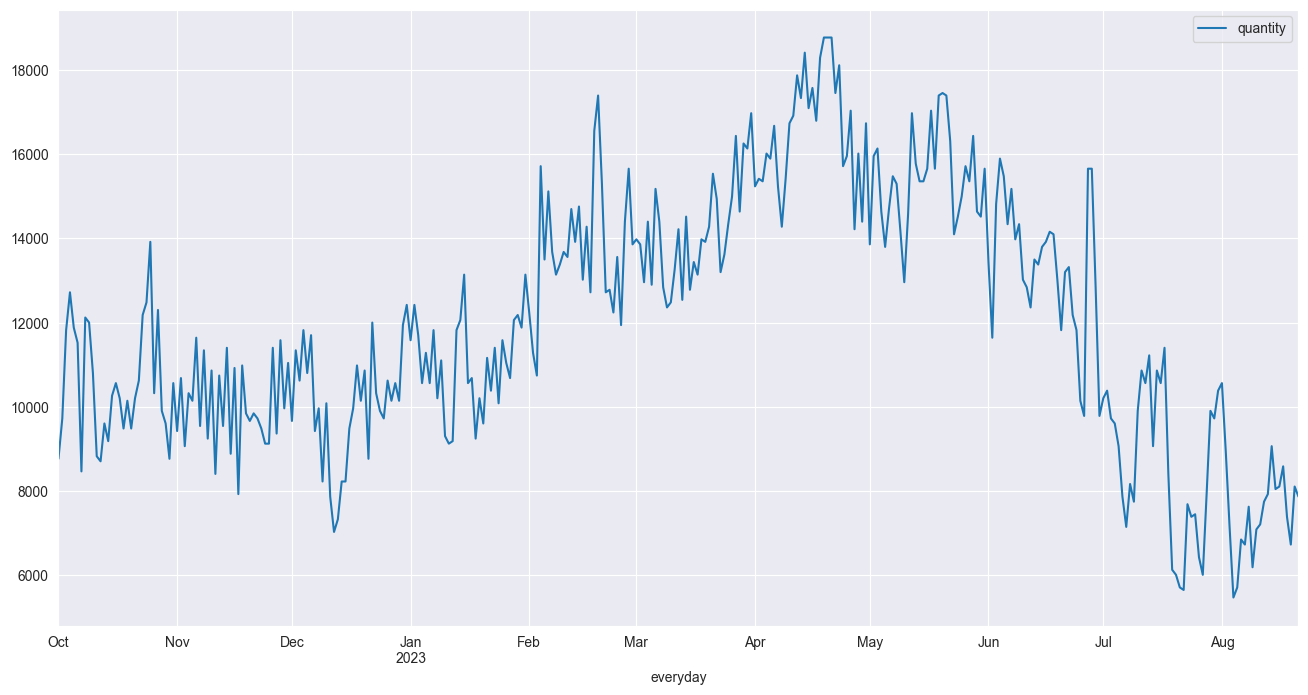

In [121]:
mpc_df = mpc_df[mpc_df.index> '2022-09-30']
mpc_df = mpc_df.asfreq('D')
mpc_df = mpc_df.fillna(method='ffill')


mpc_df.plot(figsize=(16,8))
# len(mpc_df)

<Axes: xlabel='everyday'>

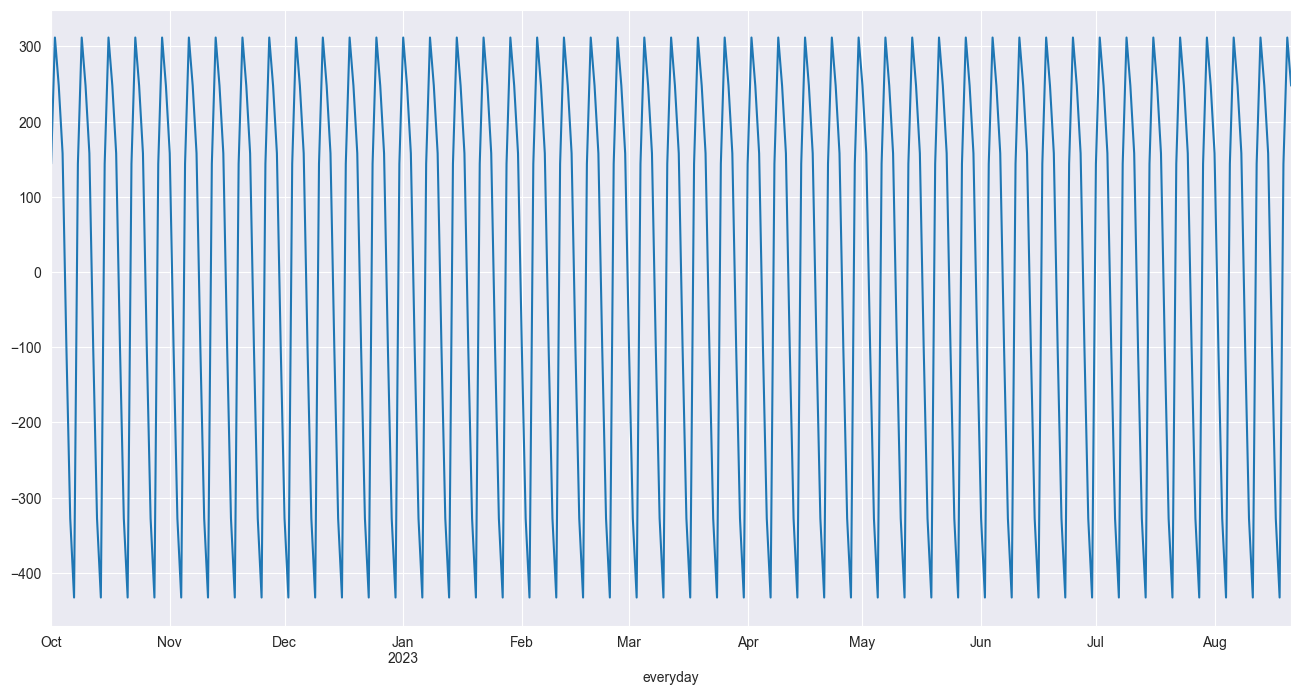

In [122]:
res = seasonal_decompose(mpc_df['quantity'])
# res.plot()
res.seasonal.plot(figsize=(16,8))

### Auto ARIMA

In [129]:
import warnings
warnings.filterwarnings('ignore')

auto_arima(mpc_df['quantity'], seasonal=True, m =7, trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=5531.027, Time=2.77 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=5618.752, Time=0.08 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=5579.089, Time=0.43 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=5579.438, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=5616.755, Time=0.05 sec
 ARIMA(2,1,2)(0,0,1)[7] intercept   : AIC=5526.833, Time=2.92 sec
 ARIMA(2,1,2)(0,0,0)[7] intercept   : AIC=5527.701, Time=1.60 sec
 ARIMA(2,1,2)(0,0,2)[7] intercept   : AIC=5521.333, Time=5.31 sec
 ARIMA(2,1,2)(1,0,2)[7] intercept   : AIC=5522.011, Time=7.75 sec
 ARIMA(1,1,2)(0,0,2)[7] intercept   : AIC=5541.896, Time=2.85 sec
 ARIMA(2,1,1)(0,0,2)[7] intercept   : AIC=5546.787, Time=4.53 sec
 ARIMA(3,1,2)(0,0,2)[7] intercept   : AIC=5523.149, Time=6.79 sec
 ARIMA(2,1,3)(0,0,2)[7] intercept   : AIC=5523.070, Time=7.64 sec
 ARIMA(1,1,1)(0,0,2)[7] intercept   : AIC=5552.615, Time=3.62 sec
 ARIMA(1,1,3)(0,0,2)[7] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  325
Model:             SARIMAX(2, 1, 2)x(0, 0, 2, 7)   Log Likelihood               -2752.759
Date:                           Tue, 07 May 2024   AIC                           5519.518
Time:                                   05:21:05   BIC                           5545.983
Sample:                               10-01-2022   HQIC                          5530.082
                                    - 08-21-2023                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3731      0.082     -4.544      0.000      -0.534      -0.212
ar.L2          0.6007      0.077      7.768      0.000       0.449       0.752
ma.L1          0.0377      0.065      0.581      0.561      -0.089       0.165
ma.L2         -0.8321      0.050    -16.606      0.000      -0.930      -0.734
ma.S.L7        0.1191      0.057      2.076      0.038       0.007       0.232
ma.S.L14       0.1524      0.063      2.433      0.015       0.030       0.275
sigma2      1.465e+06   1.11e+05     13.152      0.000    1.25e+06    1.68e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                10.08
Prob(Q):                              0.78   Prob(JB):                         0.01
Heteroskedasticity (H):               1.25   Skew:                             0.21
Prob(H) (two-sided):                  0.25   Kurtosis:                         3.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='everyday'>

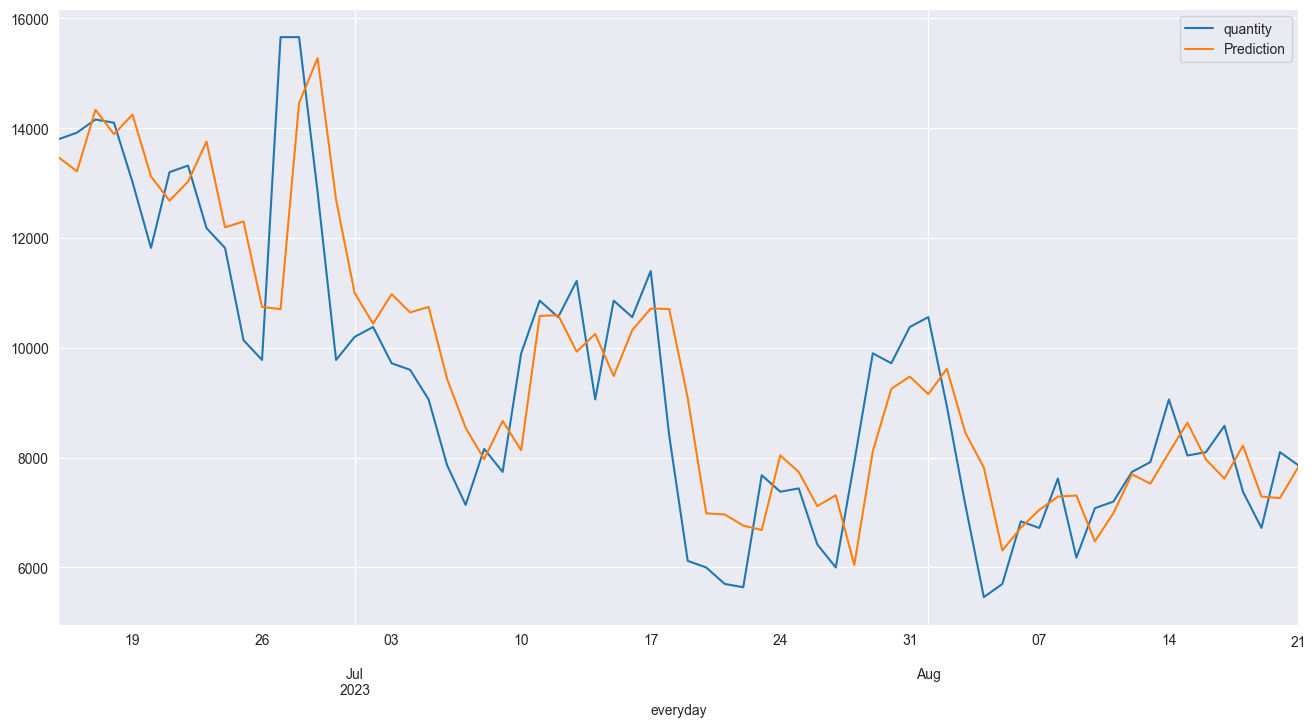

In [176]:
len(mpc_df)

train_df = mpc_df.iloc[:257]
test_df = mpc_df.iloc[257:]

mod = SARIMAX(mpc_df['quantity'], order=(2,1,2),
               seasonal_order=(0,0,2,7))
res = mod.fit()
start = len(train_df)
end = len(train_df) + len(test_df) -1
prediction = res.predict(start, end).rename('Prediction')
ax = test_df['quantity'].plot(legend=True, figsize=(16,8))
prediction.plot(legend=True)

In [177]:
from statsmodels.tools.eval_measures import rmse
rmse(test_df['quantity'], prediction)

1321.2012161933073

Text(0.5, 1.0, 'Quantity - Actual, Predicted, and Forecasted')

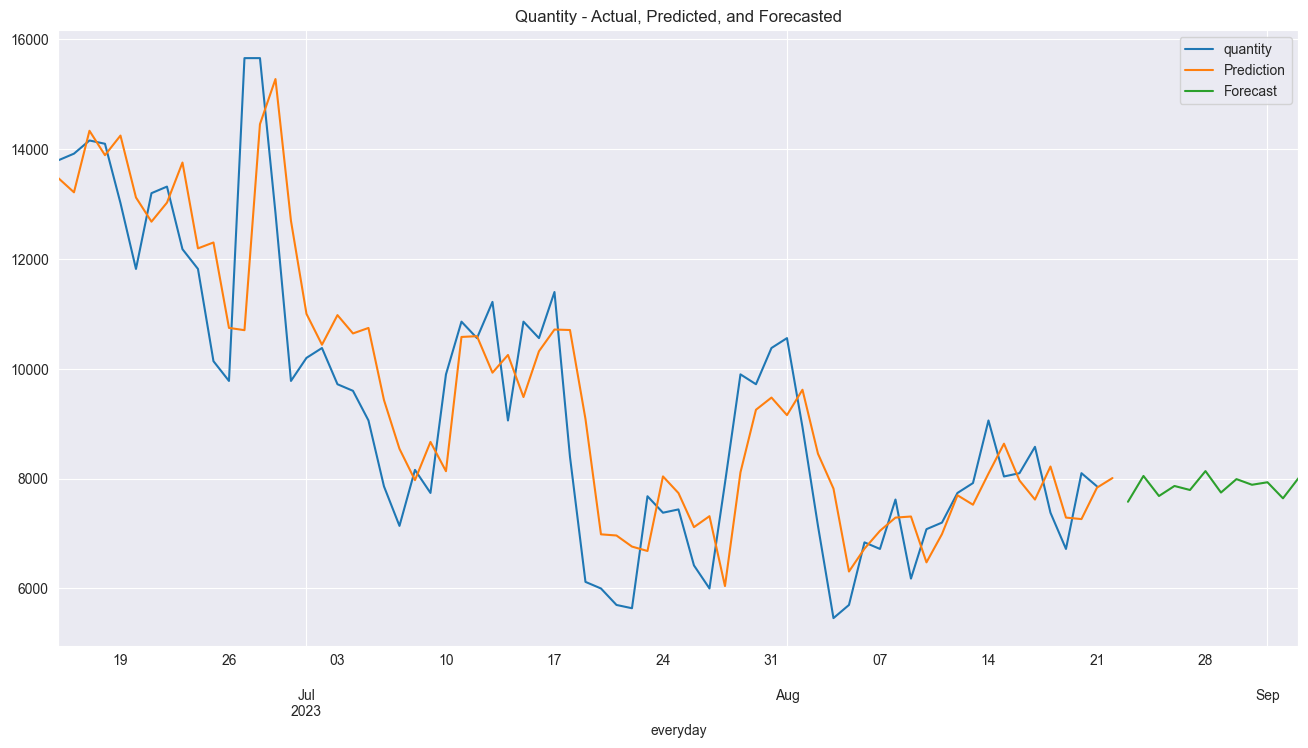

In [181]:

num_periods_to_predict = 3 * 4  # Assuming 4 weeks in a month


start = len(train_df)
end = start + len(test_df)


prediction = res.predict(start, end).rename('Prediction')  # Test set predictions
forecast = res.predict(end + 1, end + num_periods_to_predict).rename('Forecast')



test_df['quantity'].plot(legend=True, figsize=(16, 8))
prediction.plot(legend=True)
forecast.plot(legend=True)  # Distinguish forecast with dashed line
plt.title('Quantity - Actual, Predicted, and Forecasted')

In [182]:
# Also checking for Seasonal

In [142]:
auto_arima(mpc_df['quantity'], seasonal=True, m=7 , trace=True).summary

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=5531.027, Time=3.04 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=5618.752, Time=0.07 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=5579.089, Time=0.44 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=5579.438, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=5616.755, Time=0.05 sec
 ARIMA(2,1,2)(0,0,1)[7] intercept   : AIC=5526.833, Time=3.08 sec
 ARIMA(2,1,2)(0,0,0)[7] intercept   : AIC=5527.701, Time=1.66 sec
 ARIMA(2,1,2)(0,0,2)[7] intercept   : AIC=5521.333, Time=5.45 sec
 ARIMA(2,1,2)(1,0,2)[7] intercept   : AIC=5522.011, Time=7.86 sec
 ARIMA(1,1,2)(0,0,2)[7] intercept   : AIC=5541.896, Time=2.92 sec
 ARIMA(2,1,1)(0,0,2)[7] intercept   : AIC=5546.787, Time=4.61 sec
 ARIMA(3,1,2)(0,0,2)[7] intercept   : AIC=5523.149, Time=7.09 sec
 ARIMA(2,1,3)(0,0,2)[7] intercept   : AIC=5523.070, Time=8.29 sec
 ARIMA(1,1,1)(0,0,2)[7] intercept   : AIC=5552.615, Time=3.73 sec
 ARIMA(1,1,3)(0,0,2)[7] intercept

<bound method ARIMA.summary of ARIMA(order=(2, 1, 2), scoring_args={}, seasonal_order=(0, 0, 2, 7),
      suppress_warnings=True, with_intercept=False)>

<Axes: xlabel='everyday'>

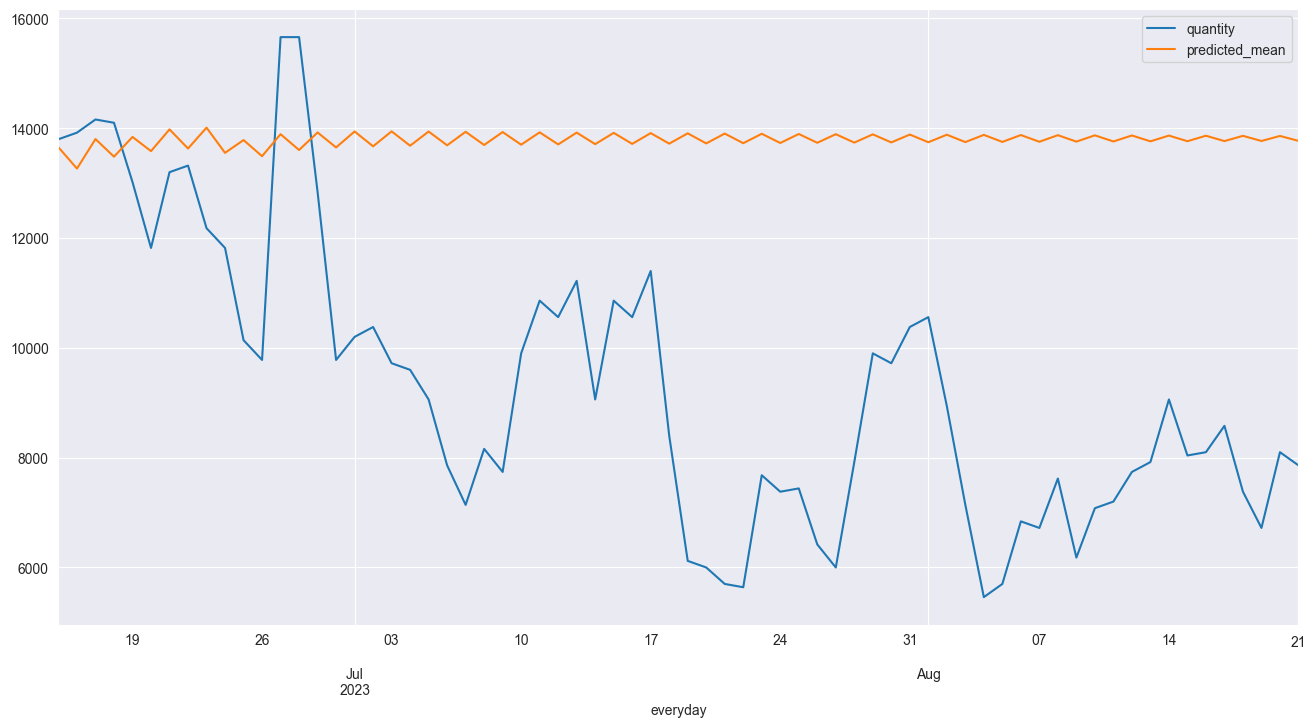

In [146]:

mod = SARIMAX(train_df['quantity'], order=(2,1,2), seasonal_order=(0,0,2,7))

res = mod.fit()
start = len(train_df)
end = len(train_df) + len(test_df) - 1

prediction = res.predict(start, end)
ax = test_df['quantity'].plot(legend=True, figsize=(16,8))
prediction.plot(legend=True)